In [1]:
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras 
import warnings

warnings.filterwarnings('ignore')
print(tf.__version__)
for model in sklearn, pd, keras, np ,mlp:
    print(model.__name__, model.__version__)

2.1.0
sklearn 0.20.2
pandas 0.24.2
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf
numpy 1.17.4
matplotlib 2.1.2


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
housing = fetch_california_housing()
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=1)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=2)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [3]:
# version 0.2 数据归一化
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_valid = std.transform(x_valid)
x_test = std.transform(x_test)

In [4]:
# tf.keras.models.Sequential()
# version dnn, 多层神经网络，循环添加层次。
model = tf.keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
    keras.layers.Dense(1),
])

# sparse_categorical_crossentropy:  如果y是一个数，会把它转化成一个向量，如 y->index., y->one hot->[]
model.compile(loss='mean_squared_error',
              optimizer='adam')


In [5]:
# version 0.3 回调函数
# Tensorboard, Earlystopping, Modelcheckpoint
logdir = './reg_callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "housing_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_valid, y_valid),callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 81us/sample - loss: 1.4220 - val_loss: 0.7152
Epoch 2/10
11610/11610 [==============================] - 0s 37us/sample - loss: 0.7006 - val_loss: 0.5760
Epoch 3/10
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5548 - val_loss: 0.5029
Epoch 4/10
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4854 - val_loss: 0.4666
Epoch 5/10
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4550 - val_loss: 0.4452
Epoch 6/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4325 - val_loss: 0.4214
Epoch 7/10
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4193 - val_loss: 0.4097
Epoch 8/10
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4091 - val_loss: 0.4023
Epoch 9/10
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4015 - val_l

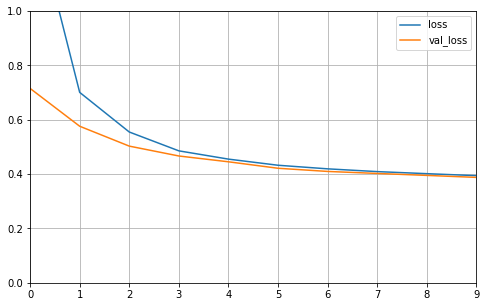

In [8]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curve(history)

In [10]:
model = keras.models.load_model(filepath='./reg_callbacks/housing_model.h5', )

In [11]:
model.evaluate(x_test,y_test)

5160/5160 [==============================] - 0s 36us/sample - loss: 0.4146


0.4146110330441201

In [12]:
model.predict_proba(x_test)

W0224 22:30:01.247902 4683924928 sequential.py:318] Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).


array([[2.5717204],
       [0.645744 ],
       [2.4979093],
       ...,
       [1.2553229],
       [2.888177 ],
       [1.6111634]], dtype=float32)